In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import path
import numpy as np
from copy import deepcopy
from sklearn.metrics import pairwise_distances
from Levenshtein import distance as levenshtein_distance

e:\Anaconda\Lib\site-packages\sklearn\manifold\_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [2]:
# Load your data
alpha_chain_data = pd.read_csv('cdr3_alpha_df.csv')
beta_chain_data = pd.read_csv('cdr3_beta_df.csv')
cdr3_alpha_beta = pd.read_csv('cdr3_alpha_beta_df.csv')

In [3]:
print(alpha_chain_data.head())

   complex.id       cdr3_a_aa         v_a_gene   j_a_gene      species  \
0           1   CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HomoSapiens   
1           2  CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HomoSapiens   
2           4   CAYRPPGTYKYIF  TRAV38-2/DV8*01  TRAJ40*01  HomoSapiens   
3           5   CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HomoSapiens   
4           6  CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HomoSapiens   

      mhc.a mhc.b mhc.class antigen.epitope  vdjdb.score  
0  HLA-B*08   B2M      MHCI        FLKEKGGL            2  
1  HLA-B*08   B2M      MHCI        FLKEKGGL            2  
2  HLA-B*08   B2M      MHCI        FLKEKGGL            2  
3  HLA-B*08   B2M      MHCI        FLKEQGGL            2  
4  HLA-B*08   B2M      MHCI        FLKEQGGL            2  


In [4]:
print(beta_chain_data.head())

   complex.id             cdr3_b_aa   v_b_gene    j_b_gene      species  \
0           1  CASSYLPGQGDHYSNQPQHF  TRBV13*01  TRBJ1-5*01  HomoSapiens   
1           2   CASSFEPGQGFYSNQPQHF  TRBV13*01  TRBJ1-5*01  HomoSapiens   
2           3  CASSYEPGQVSHYSNQPQHF  TRBV13*01  TRBJ1-5*01  HomoSapiens   
3           4        CASSALASLNEQFF  TRBV14*01  TRBJ2-1*01  HomoSapiens   
4           5  CASSYLPGQGDHYSNQPQHF  TRBV13*01  TRBJ1-5*01  HomoSapiens   

      mhc.a mhc.b mhc.class antigen.epitope  vdjdb.score  
0  HLA-B*08   B2M      MHCI        FLKEKGGL            2  
1  HLA-B*08   B2M      MHCI        FLKEKGGL            2  
2  HLA-B*08   B2M      MHCI        FLKEKGGL            2  
3  HLA-B*08   B2M      MHCI        FLKEKGGL            2  
4  HLA-B*08   B2M      MHCI        FLKEQGGL            2  


In [5]:
print(cdr3_alpha_beta.head())

   complex.id       cdr3_a_aa         v_a_gene   j_a_gene      species  \
0           1   CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HomoSapiens   
1           2  CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HomoSapiens   
2           4   CAYRPPGTYKYIF  TRAV38-2/DV8*01  TRAJ40*01  HomoSapiens   
3           5   CIVRAPGRADMRF      TRAV26-1*01  TRAJ43*01  HomoSapiens   
4           6  CAVPSGAGSYQLTF        TRAV20*01  TRAJ28*01  HomoSapiens   

      mhc.a mhc.b mhc.class antigen.epitope  vdjdb.score  \
0  HLA-B*08   B2M      MHCI        FLKEKGGL            2   
1  HLA-B*08   B2M      MHCI        FLKEKGGL            2   
2  HLA-B*08   B2M      MHCI        FLKEKGGL            2   
3  HLA-B*08   B2M      MHCI        FLKEQGGL            2   
4  HLA-B*08   B2M      MHCI        FLKEQGGL            2   

              cdr3_b_aa   v_b_gene    j_b_gene  
0  CASSYLPGQGDHYSNQPQHF  TRBV13*01  TRBJ1-5*01  
1   CASSFEPGQGFYSNQPQHF  TRBV13*01  TRBJ1-5*01  
2        CASSALASLNEQFF  TRBV14*01  TRBJ2-1*01 

In [12]:
# Extract CDR3 sequences
alpha_cdr3_homoSapiens_sequences = alpha_chain_data.loc[alpha_chain_data['species'] == 'HomoSapiens', 'cdr3_a_aa'].tolist()
alpha_cdr3_musMusculus_sequences = alpha_chain_data.loc[alpha_chain_data['species'] == 'MusMusculus', 'cdr3_a_aa'].tolist()
beta_cdr3_homoSapiens_sequences = beta_chain_data.loc[beta_chain_data['species'] == 'HomoSapiens', 'cdr3_b_aa'].tolist()
beta_cdr3_musMusculus_sequences = beta_chain_data.loc[beta_chain_data['species'] == 'MusMusculus', 'cdr3_b_aa'].tolist()
cdr3_alpha_beta_homoSapiens_sequences = [a + b for a, b in cdr3_alpha_beta.loc[cdr3_alpha_beta['species'] == 'HomoSapiens', ['cdr3_a_aa', 'cdr3_b_aa']].values.tolist()]
cdr3_alpha_beta_musMusculus_sequences = [a + b for a, b in cdr3_alpha_beta.loc[cdr3_alpha_beta['species'] == 'MusMusculus', ['cdr3_a_aa', 'cdr3_b_aa']].values.tolist()]


alpha_cdr3_sequences = alpha_cdr3_homoSapiens_sequences + alpha_cdr3_musMusculus_sequences
beta_cdr3_sequences = beta_cdr3_homoSapiens_sequences + beta_cdr3_musMusculus_sequences
cdr3_alpha_beta_sequences = cdr3_alpha_beta_homoSapiens_sequences + cdr3_alpha_beta_musMusculus_sequences


#cdr3_alpha_beta_sequences = cdr3_alpha_beta[['cdr3_a_aa','cdr3_b_aa']].values.tolist()
#cdr3_alpha_beta_sequences = [a + b for a, b in cdr3_alpha_beta[['cdr3_a_aa','cdr3_b_aa']].values.tolist()]

In [18]:
# Function to calculate the pairwise Levenshtein distance matrix
def levenshtein_distance_matrix(sequences):
    length = len(sequences)
    dist_matrix = np.zeros((length, length))
    for i in range(length):
        for j in range(i + 1, length):  # Use symmetry to save computation
            dist = levenshtein_distance(sequences[i], sequences[j])
            dist_matrix[i, j] = dist
            dist_matrix[j, i] = dist
    return dist_matrix

# Compute the distance matrices
# alpha_distance_matrix = levenshtein_distance_matrix(alpha_cdr3_sequences)
# beta_distance_matrix = levenshtein_distance_matrix(beta_cdr3_sequences)
# cdr3_alpha_beta_distance_matrix = levenshtein_distance_matrix(cdr3_alpha_beta_sequences)

alpha_cdr3_homoSapiens_distance_matrix = levenshtein_distance_matrix(alpha_cdr3_homoSapiens_sequences)
alpha_cdr3_musMusculus_distance_matrix = levenshtein_distance_matrix(alpha_cdr3_musMusculus_sequences)
beta_cdr3_homoSapiens_distance_matrix = levenshtein_distance_matrix(beta_cdr3_homoSapiens_sequences)
beta_cdr3_musMusculus_distance_matrix = levenshtein_distance_matrix(beta_cdr3_musMusculus_sequences)
cdr3_alpha_beta_homoSapiens_distance_matrix = levenshtein_distance_matrix(cdr3_alpha_beta_homoSapiens_sequences)
cdr3_alpha_beta_musMusculus_distance_matrix = levenshtein_distance_matrix(cdr3_alpha_beta_musMusculus_sequences)

# Save the matrices to CSV files
# np.savetxt("alpha_distance_matrix.csv", alpha_distance_matrix, delimiter=",")
# np.savetxt("beta_distance_matrix.csv", beta_distance_matrix, delimiter=",")
# np.savetxt("cdr3_alpha_beta_distance_matrix.csv", cdr3_alpha_beta_distance_matrix, delimiter=",")

np.savetxt("alpha_cdr3_homoSapiens_distance_matrix.csv", alpha_cdr3_homoSapiens_distance_matrix, delimiter=",")
np.savetxt("alpha_cdr3_musMusculus_distance_matrix.csv", alpha_cdr3_musMusculus_distance_matrix, delimiter=",")
np.savetxt("beta_cdr3_homoSapiens_distance_matrix.csv", beta_cdr3_homoSapiens_distance_matrix, delimiter=",")
np.savetxt("beta_cdr3_musMusculus_distance_matrix.csv", beta_cdr3_musMusculus_distance_matrix, delimiter=",")
np.savetxt("cdr3_alpha_beta_homoSapiens_distance_matrix.csv", cdr3_alpha_beta_homoSapiens_distance_matrix, delimiter=",")
np.savetxt("cdr3_alpha_beta_musMusculus_distance_matrix.csv", cdr3_alpha_beta_musMusculus_distance_matrix, delimiter=",")

OSError: [Errno 28] No space left on device

In [15]:
# Load the distance matrices from CSV files
# alpha_distance_matrix = pd.read_csv("alpha_distance_matrix.csv", delimiter=",")
# beta_distance_matrix = pd.read_csv("beta_distance_matrix.csv", delimiter=",")
# cdr3_alpha_beta_distance_matrix = pd.read_csv("cdr3_alpha_beta_distance_matrix.csv", delimiter=",")

alpha_cdr3_homoSapiens_distance_matrix = pd.read_csv("alpha_cdr3_homoSapiens_distance_matrix.csv", delimiter=",")
alpha_cdr3_musMusculus_distance_matrix = pd.read_csv("alpha_cdr3_musMusculus_distance_matrix.csv", delimiter=",")
beta_cdr3_homoSapiens_distance_matrix = pd.read_csv("beta_cdr3_homoSapiens_distance_matrix.csv", delimiter=",")
beta_cdr3_musMusculus_distance_matrix = pd.read_csv("beta_cdr3_musMusculus_distance_matrix.csv", delimiter=",")
cdr3_alpha_beta_homoSapiens_distance_matrix = pd.read_csv("cdr3_alpha_beta_homoSapiens_distance_matrix.csv", delimiter=",")
cdr3_alpha_beta_musMusculus_distance_matrix = pd.read_csv("cdr3_alpha_beta_musMusculus_distance_matrix.csv", delimiter=",")


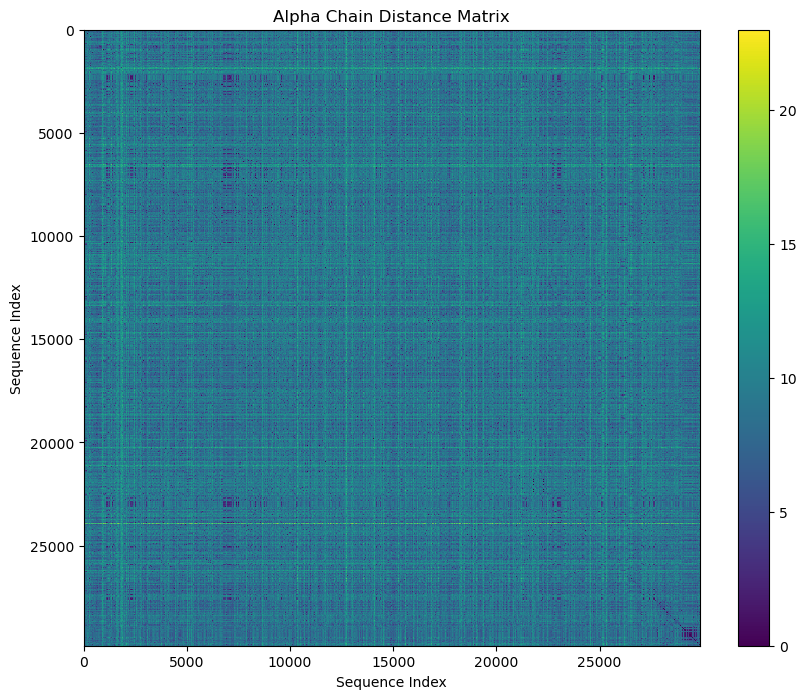

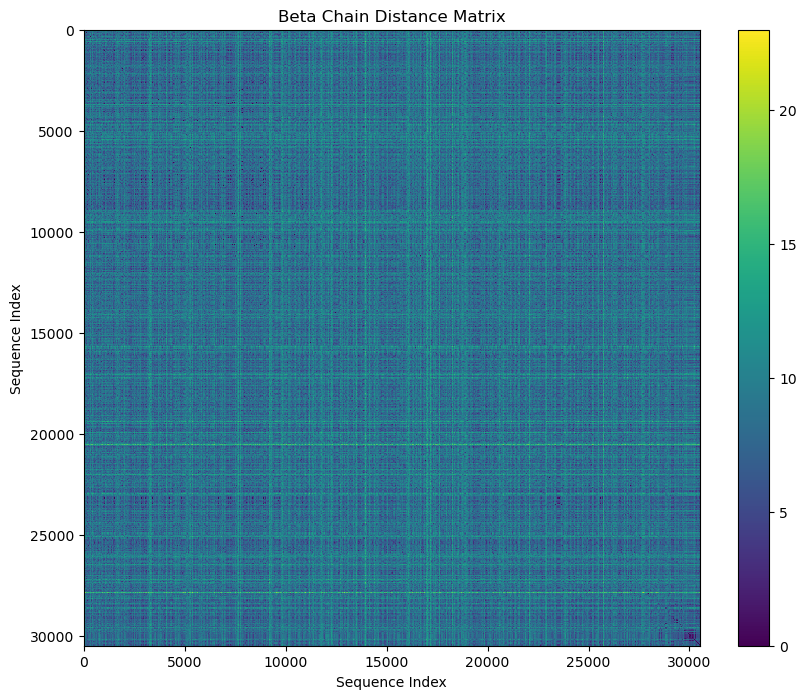

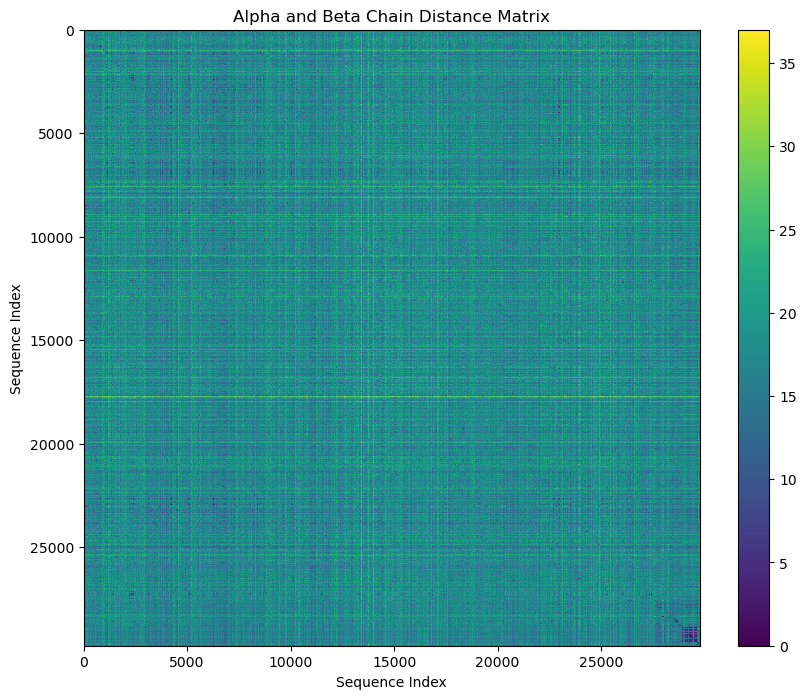

In [16]:
# Function to plot a distance matrix
def plot_distance_matrix(dist_matrix, title="Distance Matrix"):
    plt.figure(figsize=(10, 8))
    plt.imshow(dist_matrix, interpolation='nearest', cmap='viridis')
    plt.colorbar()
    plt.title(title)
    plt.xlabel("Sequence Index")
    plt.ylabel("Sequence Index")
    plt.grid(False)
    plt.show()

# Plot the alpha and beta chain distance matrices
plot_distance_matrix(alpha_distance_matrix, title="Alpha Chain Distance Matrix")
plot_distance_matrix(beta_distance_matrix, title="Beta Chain Distance Matrix")
plot_distance_matrix(cdr3_alpha_beta_distance_matrix, title="Alpha and Beta Chain Distance Matrix")